# 시계열 처리

In [1]:
import pandas as pd
import numpy as np

idx = pd.DatetimeIndex(['2019-01-01', '2020-01-01','2020-02-01', '2020-02-02', '2020-03-01'])
s = pd.Series([0, 1, 2, 3, 4], index = idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [2]:
s['2020-01-01':]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [3]:
s[:'2020-01-01']

2019-01-01    0
2020-01-01    1
dtype: int64

In [4]:
s['2019']

2019-01-01    0
dtype: int64

## 시계열 데이터 구조
|타임스탬프(timestamp)|기간(time period)|시간 델타 또는 지속시간|
|:--:|:--:|:--:|
|Pandas```Timestamp```타입 제공|Pandas```Period```타입 제공|Pandas의 ```Timedelta```타입 제공|
|파이썬 ```datetime```대체 타입||파이썬 ```datetime.timedelta```대체 타입|
|```numpy.datetime64``` 타입 기반|```numpy.datetime64```타입 기반|```numpy.timedelta64```타입 기반|
|```DatetimeIndex```인덱스 구조|```PeriodIndex```인덱스 구조|```TimedeltaIndex```인덱스 구조|

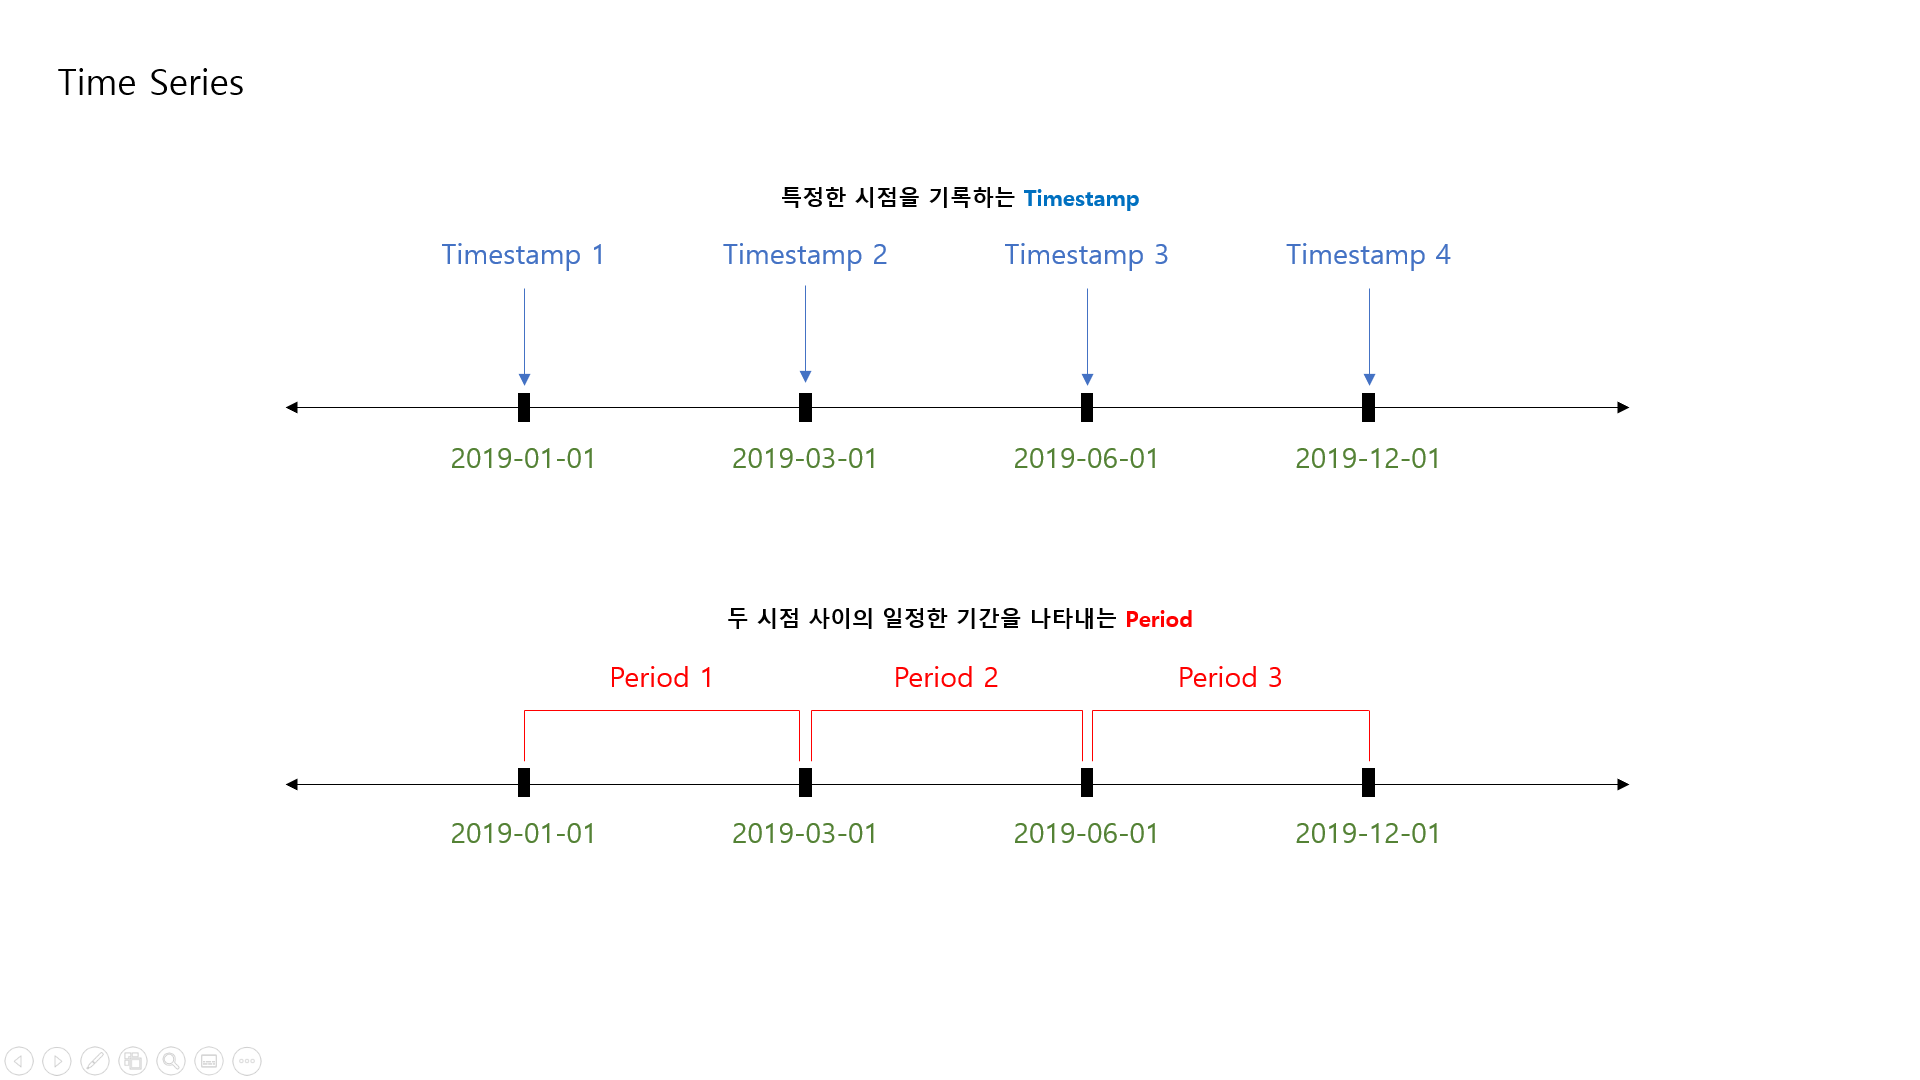

In [5]:
df = pd.read_csv('stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [6]:
print(type(df.Date[0]))
df['new_Date'] = pd.to_datetime(df.Date)
# 'Date'열을 to_datetime( )함수의 인자로 전달하면 문자열 (object) 데이터를 datetime64 자료형으로 변환
print(type(df.new_Date[0]))
print()
print(df.info())
df.head()

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB
None


,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


In [7]:
# 시계열 값으로 변환된 열을 새로운 행 인덱스로 지정. 기존 날짜 열은 삭제
df.set_index('new_Date', inplace=True)
df.drop('Date', axis =1, inplace=True)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-07-02 to 2018-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   20 non-null     int64
 1   Start   20 non-null     int64
 2   High    20 non-null     int64
 3   Low     20 non-null     int64
 4   Volume  20 non-null     int64
dtypes: int64(5)
memory usage: 960.0 bytes
None


,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


판다스 to_period( ) 함수를 이용하면 일정한 기간을 나타내는 Period 객체로 Timestamp 객체를 변환할 수 있다.  
freq 옵션에 기준이 되는 기간을 설정한다.

In [8]:
# 날짜 형식의 문자열로 구성되는 리스트 정의
dates = ['2019-01-01','2020-03-01','2021-06-01']

# 문자열 배열(시리즈 객체)을 판다스 Timestamp로 변환
ts_dates = pd.to_datetime(dates)
print(ts_dates)
print('\n')

# Timestamp를 Period로 변환
pr_day = ts_dates.to_period(freq='D')
print(pr_day)
pr_month = ts_dates.to_period(freq='M')
print(pr_month)
pr_year = ts_dates.to_period(freq='A')
print(pr_year)

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)


PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]', freq='D')
PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]', freq='M')
PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]', freq='A-DEC')


### Timestamp 배열  
- date_range( ) 함수를 사용하면 여러 개의 날짜 (Timestamp)가 들어있는 배열 형태의 시계열 데이터를 만들 수 있다
- 예제에서 날짜 범위의 시작점으로 '2019-01-01'로 설정하고
- 날짜 범위의 끝을 따로 정하지 않는다( end='None' )
- periods = 6는 Timestamp를 6개 생성한다는 뜻이며
- freq = 'MS'에서 'M'은 월을 뜻하고 'S'는 시작일을 나타낸다
- 이 경우 '2019-01-01'부터 한달 간격으로 각 달의 시작 날짜를 6개 생성한다는 뜻.
- tz='Asia/Seoul'은 한국 시간대를 설정하는 옵션

In [9]:
ts_ms = pd.date_range(start = '2019-01-01',  # 날짜 범위 시작
                      end = None,            # 날짜 범위 끝
                      periods = 6,           # 생성할 Timestamp 개수
                      freq ='MS',            # 시간 간격(MS: 월의 시작일)
                      tz = 'Asia/Seoul')     # 시간대(timezone)
print(ts_ms)

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')


In [10]:
# 시간 간격을 다르게 설정

# 월 간격, 월의 마지막 날 기준
ts_me = pd.date_range('2019-01-01',
                      periods = 6,
                      freq ='M',          # 시간 간격(M: 월의 마지막 날)
                      tz = 'Asia/Seoul')  # 시간대 (timezone)
print(ts_me)
print()

# 분기(3개월) 간격, 월의 마지막 날 기준
ts_3m = pd.date_range('2019-01-01',
                     periods = 6,
                     freq = '3M',        # 시간 간격(3M: 3개월)
                     tz = 'Asia/Seoul')  # 시간대 (timezone)
print(ts_3m)

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-02-28 00:00:00+09:00',
               '2019-03-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-05-31 00:00:00+09:00', '2019-06-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-07-31 00:00:00+09:00', '2019-10-31 00:00:00+09:00',
               '2020-01-31 00:00:00+09:00', '2020-04-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')


### Period 배열
- 판다스 period_range() 함수는 여러 개의 기간(Period)이 들어가 있는 시계열 데이터를 만듦
- 예제에서 날짜 범위의 시작점으로 '2019-01-01'을 설정하고
- 날짜 범위의 끝을 따로 정하지 않음( end=None )
- period=3 옵션은 Period 3개를 만든다는 뜻
- freq = 'M'에서 M은 월을 뜻하며
- 이 경우 PeriodIndex의 원소 '2019-01'은 2019년 1월의 전체 기간을 나타낸다

In [11]:
# Period 배열 만들기 -1개월 길이
pr_m = pd.period_range(start = '2019-01-01',  # 날짜 범위의 시작
                       end = None,            # 날짜 범위의 끝
                       periods =3,            # 생성할 Period의 개수
                       freq ='M')             # 기간의 길이(M: 월) 
print(pr_m)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]', freq='M')


In [12]:
# Period 배열 만들기 - 1시간 길이
pr_h = pd.period_range(start = '2019-01-01',
                       end = None,
                       periods = 3,
                       freq = 'H')
print(pr_h)
print()

# Period 배열 만들기 - 2시간 길이
pr_2h = pd.period_range(start = '2019-01-01',
                        end = None,
                        periods = 3,
                        freq = '2H')
print(pr_2h)

PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]', freq='H')

PeriodIndex(['2019-01-01 00:00', '2019-01-01 02:00', '2019-01-01 04:00'], dtype='period[2H]', freq='2H')


In [13]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019', datetime(2020, 1, 1),
                        '2nd of Feb 2020', '2020-Mar-4', '20200701'])
dates # 다양한 표현들을 표준으로 변형하게 됨

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [14]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]', freq='D')

In [15]:
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [16]:
pd.date_range('2020-01-01','2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [17]:
pd.date_range('2020-01-01',periods=7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [18]:
pd.date_range('2020-01-01',periods=7, freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [19]:
pd.date_range('2020-01-01', periods=7, freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [20]:
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [21]:
idx[2]

NaT

In [22]:
pd.isnull(idx)

array([False, False,  True])

## 시계열 기본

In [23]:
# from datetime import datetime을 통해 datetime 자료형에서 시계열 Series 만들기
dates = [datetime(2020, 1, 1), datetime(2020, 1, 2), datetime(2020, 1, 4), datetime(2020, 1, 7),
         datetime(2020, 1, 10), datetime(2020, 1, 11), datetime(2020, 1, 15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [24]:
ts = pd.Series(np.random.randn(7), index=(dates))
ts # 날짜 인덱스를 가지는 Series 생성

2020-01-01   -0.141824
2020-01-02   -0.177606
2020-01-04    1.200117
2020-01-07   -0.047334
2020-01-10    0.588137
2020-01-11   -0.401489
2020-01-15   -0.660147
dtype: float64

In [25]:
ts.index # 날짜 인덱스가 생성되었음을 확인할 수 있음

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [26]:
ts[ts.index[2]]

1.2001174319590133

In [27]:
ts['20200104'] # 문자열이 숫자인 형태의 날짜에서도 인덱싱이 가능

1.2001174319590133

In [28]:
ts['1/4/2020']

1.2001174319590133

In [29]:
# Series를 만들때 index에 Timestamp 배열을 만드는 형식으로 지정하여 날짜 인덱스를 생성 가능 
ts = pd.Series(np.random.rand(1000),
               index = pd.date_range('2017-10-01', periods = 1000))
ts

2017-10-01    0.744861
2017-10-02    0.369341
2017-10-03    0.132887
2017-10-04    0.003516
2017-10-05    0.480308
                ...   
2020-06-22    0.172806
2020-06-23    0.199523
2020-06-24    0.963545
2020-06-25    0.496263
2020-06-26    0.902409
Freq: D, Length: 1000, dtype: float64

In [30]:
ts['2020'] # 날짜 index를 지정할 경우 일/월/년 등의 indexing이 가능함

2020-01-01    0.998027
2020-01-02    0.433374
2020-01-03    0.162980
2020-01-04    0.466048
2020-01-05    0.712655
                ...   
2020-06-22    0.172806
2020-06-23    0.199523
2020-06-24    0.963545
2020-06-25    0.496263
2020-06-26    0.902409
Freq: D, Length: 178, dtype: float64

In [31]:
ts['2020-06']

2020-06-01    0.632641
2020-06-02    0.921037
2020-06-03    0.289463
2020-06-04    0.865559
2020-06-05    0.400716
2020-06-06    0.213228
2020-06-07    0.599227
2020-06-08    0.563393
2020-06-09    0.601286
2020-06-10    0.821927
2020-06-11    0.263081
2020-06-12    0.281135
2020-06-13    0.403453
2020-06-14    0.816949
2020-06-15    0.217947
2020-06-16    0.974266
2020-06-17    0.142430
2020-06-18    0.339115
2020-06-19    0.422467
2020-06-20    0.573728
2020-06-21    0.969894
2020-06-22    0.172806
2020-06-23    0.199523
2020-06-24    0.963545
2020-06-25    0.496263
2020-06-26    0.902409
Freq: D, dtype: float64

In [32]:
ts[datetime(2020, 6, 20): ]

2020-06-20    0.573728
2020-06-21    0.969894
2020-06-22    0.172806
2020-06-23    0.199523
2020-06-24    0.963545
2020-06-25    0.496263
2020-06-26    0.902409
Freq: D, dtype: float64

In [33]:
ts['2020-06-10':'2020-06-20']

2020-06-10    0.821927
2020-06-11    0.263081
2020-06-12    0.281135
2020-06-13    0.403453
2020-06-14    0.816949
2020-06-15    0.217947
2020-06-16    0.974266
2020-06-17    0.142430
2020-06-18    0.339115
2020-06-19    0.422467
2020-06-20    0.573728
Freq: D, dtype: float64

In [34]:
tdf = pd.DataFrame(np.random.randn(100, 4),
                   index = pd.date_range('2017-10-01', periods = 100),
                   columns = ['A','B','C','D'])
tdf

,A,B,C,D
2017-10-01,1.849368,0.995075,-0.879561,-0.090171
2017-10-02,-0.389240,-0.103472,-0.122290,-0.467305
2017-10-03,-1.231553,0.489339,1.388420,0.601485
2017-10-04,0.867366,-0.196003,-0.620884,0.020707
2017-10-05,-1.732170,0.966194,1.349058,0.069439
...,...,...,...,...
2018-01-04,-0.215617,0.171160,0.084731,0.415230
2018-01-05,-0.062671,0.087384,0.032914,0.046751
2018-01-06,-1.150745,0.274825,-0.186688,-1.557969
2018-01-07,-0.198597,-0.771202,-1.979000,1.133084


In [35]:
tdf.loc['2018'] # 인덱싱 시에 년도만을 입력하는 것만으로도 해당 모든 년도의 데이터 추출 가능

,A,B,C,D
2018-01-01,0.517220,-0.677076,-1.366935,-0.428233
2018-01-02,-0.634388,0.892635,-0.125358,-0.455260
2018-01-03,-1.066333,-0.056530,-0.116524,-0.409554
2018-01-04,-0.215617,0.171160,0.084731,0.415230
2018-01-05,-0.062671,0.087384,0.032914,0.046751
2018-01-06,-1.150745,0.274825,-0.186688,-1.557969
2018-01-07,-0.198597,-0.771202,-1.979000,1.133084
2018-01-08,1.218650,1.454391,-0.009015,0.386381


In [36]:
tdf.loc['2017-12'] # 인덱싱 시에 년도와 월만을 입력하는 것만으로도 해당 년도 해당 월의 모든 데이터 추출 가능

,A,B,C,D
2017-12-01,-1.591403,-1.035661,0.728412,0.124857
2017-12-02,0.269389,0.944639,-1.287270,-1.422094
2017-12-03,-1.393862,0.017999,1.331661,-1.630001
2017-12-04,-1.107014,2.242225,0.714408,0.606588
2017-12-05,1.536721,1.120026,-0.407084,-0.265381
2017-12-06,-0.482733,-1.234475,1.495878,0.127733
2017-12-07,-1.889096,0.908573,0.114954,-0.431366
2017-12-08,1.902482,0.553568,-1.787214,-0.477422
2017-12-09,-0.498134,1.474164,0.389536,1.017028
2017-12-10,1.781858,2.122318,-0.808616,-1.055403


In [37]:
tdf.loc['2017-12-31']

A   -0.658800
B   -0.392559
C    0.927307
D    1.062353
Name: 2017-12-31 00:00:00, dtype: float64

In [38]:
ts = pd.Series(np.random.randn(10),
               index = pd.DatetimeIndex(['2020-01-01','2020-01-01','2020-01-02','2020-01-02', '2020-01-03',
                                         '2020-01-04','2020-01-05','2020-01-05','2020-01-06','2020-01-07']))
ts

2020-01-01    1.194288
2020-01-01   -0.950910
2020-01-02    0.010457
2020-01-02   -0.035699
2020-01-03   -0.168925
2020-01-04    0.877030
2020-01-05   -1.156674
2020-01-05    1.419571
2020-01-06    1.206880
2020-01-07   -1.239935
dtype: float64

In [39]:
ts.index.is_unique  # 중복되는 인덱스가 존재함

False

In [40]:
ts['2020-01-01']

2020-01-01    1.194288
2020-01-01   -0.950910
dtype: float64

In [41]:
ts.groupby(level=0).mean() # 시계열 index로도 groupby가 가능함

2020-01-01    0.121689
2020-01-02   -0.012621
2020-01-03   -0.168925
2020-01-04    0.877030
2020-01-05    0.131448
2020-01-06    1.206880
2020-01-07   -1.239935
dtype: float64

In [42]:
pd.date_range('2020-01-01','2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

## 주기와 오프셋
- 주기코드
|코드|오프셋|설명|
|:-|:-|:-|
|```D```|Day|달력상 일|
|```B```|BusinessDay|영업일|
|```W-MON```, ```WTUE```,...|Week|주|
|```WON-MON```, ```WON-2MON```,...|Week of Month|월별 주차와 요일|
|```MS```|MonthBegin|월 시작일|
|```BMS```|BusinessMonthBegin|영업일 기준 월 시작일|
|```M```|MonthEnd|월 마지막일|
|```BM```|BusinessMonthEnd|영업일 기준 월 마지막일|
|```QS-JAN```, ```GS-FEB```,...|QuarterBegin|분기 시작|
|```BQS-JAN```, ```BQS-FEB```,...|BusinessQuarterBegin|영업일 기준 분기 시작|
|```Q-JAN```, ```Q-FEB```,...|QuarterEnd|분기 마지막|
|```BQ-JAN```, ```BQ- FEB```, ...|BusinessQuarterEnd|영업일 기준 분기 마지막|
|```AS-JAN```, ```AS-FEB```,...|YearBegin|연초|
|```BAS-JAN```, ```BAS-FEB```, ...|BusinessYearBegin|영업일 기준 연초|
|```A-JAN```, ```A-FEB```,...|YearEnd|연말|
|```BA-JAN```, ```BA-FEB```,...|BusinessYearEnd|영업일 기준 연말|
|```H```|Hour|시간|
|```BH```|BusinessHour|영업 시간|
|```T``` 또는 ```min```|Minute|분|
|```S```|Second|초|

- 날짜, 시간 타입은 일반적인 정수, 실수끼리 연산할 때와 달리 단위를 가지고 있는 점 때문에 시간의 차이를 저장하는 별도의 클래스가 있다  
    - 이를 timedelta(타임델타)라고 함
- 날짜, 시간은 특정 시점의 시각을 표시하는 용도(2021년 3월 16일)
- 타임델타는 기간 또는 시간 차이를 표시하는 용도(5일)
- 따라서 python에서 날짜, 또는 타임델타 변수 간 계산 시 출력되는 데이터 타입은 아래와 같은 구조를 가짐

<br>
<br>

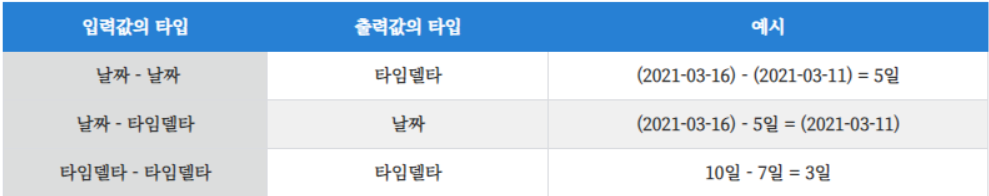

In [43]:
# timedelta를 12개 만드는데 단위를 시간으로 만들어라
pd.timedelta_range(0, periods=12, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [44]:
# timedelta를 60개 만드는 데 단위는 분으로 만들어라
pd.timedelta_range(0, periods=60, freq='T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [45]:
# timedelta를 10개를 만드는데 단위는 1시간 30분마다 만들어라
pd.timedelta_range(0, periods = 10, freq='1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [46]:
# date 범위를 생성하는데 2020년 01월 01일을 시작으로 
# 영업일 기준으로 20개 생성해라
pd.date_range('2020-01-01', end = None,
              periods = 10, freq = 'B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14'],
              dtype='datetime64[ns]', freq='B')

In [47]:
# date 범위를 생성하는데 2020년 01월 01일을 시작으로 
# 2시간 단위로 30개 생성
pd.date_range('2020-01-01', end = None,
              periods = 30, freq = '2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [48]:
# date 범위를 생성하는데 2020년 01월 01일을 시작으로 
# 초단위로 20개 생성
pd.date_range('2020-01-01', end = None,
              periods = 20, freq = 'S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19'],
              dtype='datetime64[ns]', freq='S')

## 시프트( Shift )

In [49]:
ts = pd.Series(np.random.randn(5),
               index = pd.date_range('2020-01-02', periods = 5, freq = 'B'))
ts

2020-01-02   -1.007203
2020-01-03   -1.231985
2020-01-06    1.056946
2020-01-07    0.887600
2020-01-08    0.223172
Freq: B, dtype: float64

In [50]:
ts.shift(1) # 값이 하나씩 밀림

2020-01-02         NaN
2020-01-03   -1.007203
2020-01-06   -1.231985
2020-01-07    1.056946
2020-01-08    0.887600
Freq: B, dtype: float64

In [51]:
ts.shift(3)

2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07   -1.007203
2020-01-08   -1.231985
Freq: B, dtype: float64

In [52]:
ts.shift(-2)

2020-01-02    1.056946
2020-01-03    0.887600
2020-01-06    0.223172
2020-01-07         NaN
2020-01-08         NaN
Freq: B, dtype: float64

In [53]:
ts.shift(3, freq='B')
# 영업일 기준으로 3일을 뒤로 옮김
# 1월 1일은 신정으로 영업을 하지 않고 2, 3, 4일의 값을 뒤로 옮기는ㄷ
# 1월 5/6일이 주말이므로 1월 6일부터 시작

2020-01-07   -1.007203
2020-01-08   -1.231985
2020-01-09    1.056946
2020-01-10    0.887600
2020-01-13    0.223172
Freq: B, dtype: float64

In [54]:
ts.shift(2, freq='W')
# 주 기준으로 2주를 뒤로 옮김
# 1/1(주의 시작이 수요일) 1/5를 넘겨서 1월 3주차인 12일 부터 시작
# 같은 주에 속하는 값들이 3:2로 나눠져 있기 때문에 1월 12일 값이 3개 1월 19일 값이 2개

2020-01-12   -1.007203
2020-01-12   -1.231985
2020-01-19    1.056946
2020-01-19    0.887600
2020-01-19    0.223172
dtype: float64

## 시간대 처리
- 국제 표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
- 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 ```pytz``` 사용

- pandas의 date_range() 함수로 날짜 - 시간 DatetimeIndex를 생성하면 디폴트로는 시간대가 없는 naive한 상태로 생성이 됌
- 이런 naive time-zone에서 특정 국가/지역의 시간대를 설정하고 싶을 때는 tz_localize( ) 메소드를 이용함
- 만약 naive time-zone상태에서 시간대를 설정해주기 위해 tz_convert( ) 메소드를 사용하면 'TypeError'가 발생함

<br>

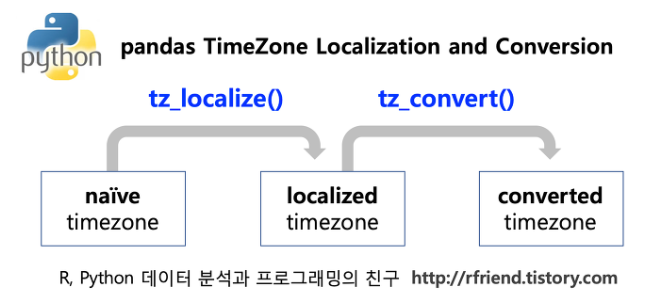

특정 시간대를 다른 시간대로 바꾸기  
- 그러나 localized가 된 상태에서 다시 tz_localize( )를 적용할 경우, 에러가 발생한다.
- 이런 경우엔 tz_localize( )가 아닌 tz_converted( )를 적용해야 한다.

In [55]:
import pytz
tz = pytz.timezone('Asia/Seoul')

In [56]:
dinx = pd.date_range('2020-01-01 09:00', periods = 7, freq = 'B')
ts = pd.Series(np.random.randn(len(dinx)), index = dinx)
ts

2020-01-01 09:00:00    0.566571
2020-01-02 09:00:00    1.243993
2020-01-03 09:00:00   -0.527019
2020-01-06 09:00:00   -0.836206
2020-01-07 09:00:00    0.399913
2020-01-08 09:00:00    0.819477
2020-01-09 09:00:00   -2.617760
Freq: B, dtype: float64

In [57]:
pd.date_range('2020-01-01 09:00',
               periods = 7,
               freq = 'B',
               tz = 'utc')

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [58]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00    0.566571
2020-01-02 09:00:00+00:00    1.243993
2020-01-03 09:00:00+00:00   -0.527019
2020-01-06 09:00:00+00:00   -0.836206
2020-01-07 09:00:00+00:00    0.399913
2020-01-08 09:00:00+00:00    0.819477
2020-01-09 09:00:00+00:00   -2.617760
Freq: B, dtype: float64

In [59]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00    0.566571
2020-01-02 18:00:00+09:00    1.243993
2020-01-03 18:00:00+09:00   -0.527019
2020-01-06 18:00:00+09:00   -0.836206
2020-01-07 18:00:00+09:00    0.399913
2020-01-08 18:00:00+09:00    0.819477
2020-01-09 18:00:00+09:00   -2.617760
Freq: B, dtype: float64

In [60]:
naive_timezone = pd.date_range('2020-01-01', periods=6,
                               end = None, freq = 'D')
naive_timezone

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [61]:
localized_timezone = naive_timezone.tz_localize('Asia/Seoul')
localized_timezone

DatetimeIndex(['2020-01-01 00:00:00+09:00', '2020-01-02 00:00:00+09:00',
               '2020-01-03 00:00:00+09:00', '2020-01-04 00:00:00+09:00',
               '2020-01-05 00:00:00+09:00', '2020-01-06 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq=None)

In [62]:
# naive한 상태에서 바로 convert를 적용하면 에러가 발생
# Error_timezone = naive_timezone.tz_convert('Asia/Seoul')

In [63]:
# localized가 된 상태에서 다시 한번 localize를 적용하면 에러가 발생
# try_timezone = localized_timezone.tz_localize('Asia/Singapore')

In [64]:
ts_utc.tz_convert('Asia/Seoul') # 이미 위에서 UTC로 localize를 실행하였기에 가능

2020-01-01 18:00:00+09:00    0.566571
2020-01-02 18:00:00+09:00    1.243993
2020-01-03 18:00:00+09:00   -0.527019
2020-01-06 18:00:00+09:00   -0.836206
2020-01-07 18:00:00+09:00    0.399913
2020-01-08 18:00:00+09:00    0.819477
2020-01-09 18:00:00+09:00   -2.617760
Freq: B, dtype: float64

In [65]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00    0.566571
2020-01-02 09:00:00+09:00    1.243993
2020-01-03 09:00:00+09:00   -0.527019
2020-01-06 09:00:00+09:00   -0.836206
2020-01-07 09:00:00+09:00    0.399913
2020-01-08 09:00:00+09:00    0.819477
2020-01-09 09:00:00+09:00   -2.617760
dtype: float64

In [66]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00    0.566571
2020-01-02 00:00:00+00:00    1.243993
2020-01-03 00:00:00+00:00   -0.527019
2020-01-06 00:00:00+00:00   -0.836206
2020-01-07 00:00:00+00:00    0.399913
2020-01-08 00:00:00+00:00    0.819477
2020-01-09 00:00:00+00:00   -2.617760
dtype: float64

In [67]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [68]:
stamp_utc.value

1577880000000000000

In [69]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [70]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [71]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz='America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [72]:
stamp_ny.value

1577898000000000000

In [73]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [74]:
stamp = pd.Timestamp('2020-01-01 12:00', tz = 'Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [75]:
from pandas.tseries.offsets import Hour
stamp + Hour() # 이것을 이용하여 summer time에 대한 조정이 가능

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [76]:
stamp + 3 * Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [77]:
ts_utc

2020-01-01 09:00:00+00:00    0.566571
2020-01-02 09:00:00+00:00    1.243993
2020-01-03 09:00:00+00:00   -0.527019
2020-01-06 09:00:00+00:00   -0.836206
2020-01-07 09:00:00+00:00    0.399913
2020-01-08 09:00:00+00:00    0.819477
2020-01-09 09:00:00+00:00   -2.617760
Freq: B, dtype: float64

In [78]:
ts1 = ts_utc.tz_convert('Europe/Berlin')
ts2 = ts_utc.tz_convert('America/New_York')
ts = ts1 + ts2
ts

2020-01-01 09:00:00+00:00    1.133141
2020-01-02 09:00:00+00:00    2.487985
2020-01-03 09:00:00+00:00   -1.054039
2020-01-06 09:00:00+00:00   -1.672413
2020-01-07 09:00:00+00:00    0.799827
2020-01-08 09:00:00+00:00    1.638955
2020-01-09 09:00:00+00:00   -5.235519
Freq: B, dtype: float64

In [79]:
ts.index # 서로 다른 timezone을 연산했을 경우, UTC로 자동 변환이 된다.

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 기간과 기간 연산

In [80]:
p = pd.Period(2020, freq='A-JAN')
p # 객체 생성

Period('2020', 'A-JAN')

In [81]:
p + 2

Period('2022', 'A-JAN')

In [82]:
p + 3

Period('2023', 'A-JAN')

In [83]:
t = pd.Timestamp('2020', freq = 'A')
t

Timestamp('2020-01-01 00:00:00', freq='A-DEC')

In [84]:
# Timestamp는 Period와는 다르게 기간 연산이 되지 않는다.
# t + 2

In [85]:
# Period가 Timestamp와 다르게 기간 별 연산이 가능한 이유는 바로 Period는 기간에 대한 변수이기 때문이다
# 그에 반해 Timestamp는 기간이 아닌 시점에 대한 변수이다.
p1 = pd.Period(2010, freq = 'A-JAN')
p2 = pd.Period(2020, freq = 'A-JAN')
p2-p1

<10 * YearEnds: month=1>

In [86]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq='M')
pr

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06'], dtype='period[M]', freq='M')

In [87]:
pd.Series(np.random.randn(6), index = pr)

2020-01    2.483464
2020-02   -1.346837
2020-03    0.780591
2020-04    1.092973
2020-05    1.011489
2020-06    1.404713
Freq: M, dtype: float64

In [88]:
p = pd.Period('2020', freq = 'A-FEB')
p

Period('2020', 'A-FEB')

In [89]:
p.asfreq('M', how='start')

Period('2019-03', 'M')

In [90]:
p.asfreq('M', how='end')

Period('2020-02', 'M')

In [91]:
p = pd.Period('2020', freq='A-OCT')
p

Period('2020', 'A-OCT')

In [92]:
p.asfreq('M', how='start')

Period('2019-11', 'M')

In [93]:
p.asfreq('M', how='end')

Period('2020-10', 'M')

In [94]:
pr = pd.period_range('2010','2020', freq='A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index=pr)
ts

2010   -0.510318
2011    1.485253
2012    1.343335
2013   -0.505057
2014    0.914997
2015    0.484986
2016    1.860528
2017   -0.064478
2018   -0.956334
2019   -0.623366
2020    0.445023
Freq: A-JAN, dtype: float64

In [95]:
ts.asfreq('M', how = 'start')

2009-02   -0.510318
2010-02    1.485253
2011-02    1.343335
2012-02   -0.505057
2013-02    0.914997
2014-02    0.484986
2015-02    1.860528
2016-02   -0.064478
2017-02   -0.956334
2018-02   -0.623366
2019-02    0.445023
Freq: M, dtype: float64

In [96]:
ts.asfreq('M', how = 'end')

2010-01   -0.510318
2011-01    1.485253
2012-01    1.343335
2013-01   -0.505057
2014-01    0.914997
2015-01    0.484986
2016-01    1.860528
2017-01   -0.064478
2018-01   -0.956334
2019-01   -0.623366
2020-01    0.445023
Freq: M, dtype: float64

In [97]:
ts.asfreq('B', how = 'end')

2010-01-29   -0.510318
2011-01-31    1.485253
2012-01-31    1.343335
2013-01-31   -0.505057
2014-01-31    0.914997
2015-01-30    0.484986
2016-01-29    1.860528
2017-01-31   -0.064478
2018-01-31   -0.956334
2019-01-31   -0.623366
2020-01-31    0.445023
Freq: B, dtype: float64

In [98]:
ts.asfreq('B', how = 'start')

2009-02-02   -0.510318
2010-02-01    1.485253
2011-02-01    1.343335
2012-02-01   -0.505057
2013-02-01    0.914997
2014-02-03    0.484986
2015-02-02    1.860528
2016-02-01   -0.064478
2017-02-01   -0.956334
2018-02-01   -0.623366
2019-02-01    0.445023
Freq: B, dtype: float64

In [99]:
p = pd.Period('2020Q2', freq='Q-JAN')
p

Period('2020Q2', 'Q-JAN')

In [100]:
p.asfreq('D','start')

Period('2019-05-01', 'D')

In [101]:
p.asfreq('D', 'end')

Period('2019-07-31', 'D')

In [102]:
# pd.period_range로 period배열로 index를 지정하면 
# '2019Q3'의 형태로 기간이 반환된다,
pr = pd.period_range('2019Q3','2020Q3', freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index = pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int32

In [103]:
# pd.date_range로 Timestamp 배열로 index를 지정하면 
# '2020-01-31'의 형태로 정확한 시점이 반환된다.
pr = pd.date_range('2020-01-01', periods = 5, freq='Q-JAN')
ts = pd.Series(np.random.randn(5), index =pr)
ts

2020-01-31    0.456281
2020-04-30   -0.506601
2020-07-31   -0.906941
2020-10-31   -1.405300
2021-01-31    0.350078
Freq: Q-JAN, dtype: float64

In [104]:
ts.to_period( )

2020Q4    0.456281
2021Q1   -0.506601
2021Q2   -0.906941
2021Q3   -1.405300
2021Q4    0.350078
Freq: Q-JAN, dtype: float64

In [105]:
pr = pd.date_range('2020-01-01', periods = 5, freq = 'D')
ts = pd.Series(np.random.randn(5), index = pr)
ts

2020-01-01    0.921928
2020-01-02   -0.114841
2020-01-03    1.084863
2020-01-04    0.738065
2020-01-05   -0.522384
Freq: D, dtype: float64

In [106]:
p = ts.to_period('M')
p

2020-01    0.921928
2020-01   -0.114841
2020-01    1.084863
2020-01    0.738065
2020-01   -0.522384
Freq: M, dtype: float64

In [107]:
p.to_timestamp(how='start')

2020-01-01    0.921928
2020-01-01   -0.114841
2020-01-01    1.084863
2020-01-01    0.738065
2020-01-01   -0.522384
dtype: float64

## 리샘플링(Resampling)
- 리샘플링(Resampling): 시계열의 빈도 반환
- 다운 샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
- 업샘플링(Up sampling): 하위 빈도 데이터를 상위빈도 데이터로 집계
- ```resample```메소드


|인자|설명|
|:-|:-|
|```freq```|리샘플링 빈도|
|```axis```|리샘플링 축 (기본값 ```axis=0```)|
|```fill-mothod```|업샘플링시 보간 수행 (```None```, ```ffill```,```bf11```)|
|```closed```|다운샘플링 시 각 간격의 포함 위치 (```right```, ```left```)|
|```label```|다운샘플링 시 집계된 결과 라벨 결정 (```right```, ```Left```)|
|```loffset```|나뉜 그룹이 라벨을 맞추기 위한 오프셋|
|```limit```|보간법을 시용할 때 보간을 적용할 최대 기간|
|```kind```|기간(```period```) 또는 타임스탬프(```timestamp```) 집계 구분|
|```convention```|기간을 리샘플링할 때 하위 빈도 기간에서 상위 빈도로 변환 시 방식 (```start``` 또는 ```end```)

In [109]:
dr = pd.date_range('2020-01-01', periods=200, freq='D')
ts = pd.Series(np.random.randn(len(dr)), index=dr)
ts

2020-01-01   -2.338947
2020-01-02    1.413227
2020-01-03    0.260918
2020-01-04   -1.472416
2020-01-05   -0.989405
                ...   
2020-07-14    0.689319
2020-07-15    2.273158
2020-07-16    0.233558
2020-07-17   -2.426093
2020-07-18   -1.468931
Freq: D, Length: 200, dtype: float64

In [110]:
ts.resample('M').mean()

2020-01-31    0.279049
2020-02-29   -0.281241
2020-03-31   -0.037502
2020-04-30   -0.289204
2020-05-31    0.060778
2020-06-30    0.250231
2020-07-31    0.097631
Freq: M, dtype: float64

In [113]:
ts.resample('M', kind='period').mean()

2020-01    0.279049
2020-02   -0.281241
2020-03   -0.037502
2020-04   -0.289204
2020-05    0.060778
2020-06    0.250231
2020-07    0.097631
Freq: M, dtype: float64

In [116]:
df.resample('M', kind='period').mean()
# 데이터프레임도 resample이 가능

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-06,11744.736842,11802.631579,12073.684211,11446.842105,159068.736842
2018-07,10100.000000,10850.000000,10900.000000,10000.000000,137977.000000


In [118]:
dr = pd.date_range('2020-01-01', periods=10, freq='T')
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int32

In [119]:
ts.resample('2T', closed='left').sum()
# 2 초간격으로 sum을 하여 집계하고
# 앞으로 집계함

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int32

In [120]:
ts.resample('2T', closed='right').sum( )

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int32

In [121]:
ts.resample('2T', closed='right', label='right').sum( )

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int32

In [122]:
ts.resample('2T', closed='right', label='right', offset='-1s').sum( )
# 1초씩 간격이 감해짐

2020-01-01 00:01:59     1
2020-01-01 00:03:59     5
2020-01-01 00:05:59     9
2020-01-01 00:07:59    13
2020-01-01 00:09:59    17
Freq: 2T, dtype: int32

In [123]:
ts.resample('2T').ohlc()
# '시가','장중 최고가','장중 최고가','종가'를 표로 반환함

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [124]:
df = pd.DataFrame(np.random.randn(10, 4),
                 index=pd.date_range('2019-10-01', periods=10, freq='M'),
                  columns=['C1','C2','C3','C4'])
df

,C1,C2,C3,C4
2019-10-31,-2.025885,1.660003,1.677504,0.007611
2019-11-30,-0.215240,-0.957122,-0.678126,-0.624336
2019-12-31,-0.936520,1.442121,-0.756684,-0.964139
2020-01-31,-1.027109,0.036849,-2.657258,-0.962204
2020-02-29,1.435080,-0.985872,0.169552,-1.194387
2020-03-31,-0.073025,0.254979,0.460933,-0.179256
2020-04-30,-1.517658,1.000889,0.535377,-0.710543
2020-05-31,-1.185022,1.295608,-1.796033,1.273857
2020-06-30,-0.187340,-0.289780,-1.148661,0.280166
2020-07-31,1.366477,0.154886,0.430551,-1.485805


In [127]:
df.resample('Y').asfreq()

,C1,C2,C3,C4
2019-12-31,-0.93652,1.442121,-0.756684,-0.964139
2020-12-31,NaN,NaN,NaN,NaN


In [135]:
dt = pd.DataFrame({'c1':range(15),
                  'c2':range(15),
                  'c3':range(15),
                  'c4':range(15)}, 
                  index = pd.date_range('2019-10-01', periods=15, freq='M'))
dt

,c1,c2,c3,c4
2019-10-31,0,0,0,0
2019-11-30,1,1,1,1
2019-12-31,2,2,2,2
2020-01-31,3,3,3,3
2020-02-29,4,4,4,4
2020-03-31,5,5,5,5
2020-04-30,6,6,6,6
2020-05-31,7,7,7,7
2020-06-30,8,8,8,8
2020-07-31,9,9,9,9


In [137]:
dt.resample('Y').asfreq()
# 연말에 대한 값들만 출력함

,c1,c2,c3,c4
2019-12-31,2,2,2,2
2020-12-31,14,14,14,14


In [138]:
df.resample('W-FRI').asfreq() 

,C1,C2,C3,C4
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [139]:
df.resample('H').asfreq()

,C1,C2,C3,C4
2019-10-31 00:00:00,-2.025885,1.660003,1.677504,0.007611
2019-10-31 01:00:00,NaN,NaN,NaN,NaN
2019-10-31 02:00:00,NaN,NaN,NaN,NaN
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [141]:
df.resample('H').ffill(limit=2)
# 결측치를 채울 때 앞의 값을 참조하면서 2개만 채움

,C1,C2,C3,C4
2019-10-31 00:00:00,-2.025885,1.660003,1.677504,0.007611
2019-10-31 01:00:00,-2.025885,1.660003,1.677504,0.007611
2019-10-31 02:00:00,-2.025885,1.660003,1.677504,0.007611
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [142]:
df.resample('Q-DEC').mean()

,C1,C2,C3,C4
2019-12-31,-1.059215,0.715000,0.080898,-0.526954
2020-03-31,0.111649,-0.231348,-0.675591,-0.778616
2020-06-30,-0.963340,0.668906,-0.803106,0.281160
2020-09-30,1.366477,0.154886,0.430551,-1.485805


In [143]:
df.resample('Y').mean()

,C1,C2,C3,C4
2019-12-31,-1.059215,0.715000,0.080898,-0.526954
2020-12-31,-0.169799,0.209651,-0.572220,-0.425453


## 무빙 윈도우(Moving Window)
- 이동평균에 대한 내용

In [144]:
df = pd.DataFrame(np.random.randn(300, 4),
                  index = pd.date_range('2020-01-01', periods=300,freq='D'),
                  columns=['C1','C2','C3','C4'])
df

,C1,C2,C3,C4
2020-01-01,-1.218748,1.435438,1.329794,0.406522
2020-01-02,0.845703,0.346255,-0.447531,0.627292
2020-01-03,-0.795539,-1.743365,-1.189107,-1.597942
2020-01-04,0.281643,-0.562302,0.773094,1.777284
2020-01-05,0.887257,0.188959,0.171621,-0.412791
...,...,...,...,...
2020-10-22,-0.143278,1.294535,1.010522,0.620429
2020-10-23,-0.174784,0.038696,-0.340052,0.995685
2020-10-24,0.465179,-0.603013,0.574129,0.009003
2020-10-25,-1.262511,-0.087706,0.549148,1.713170


<AxesSubplot:>

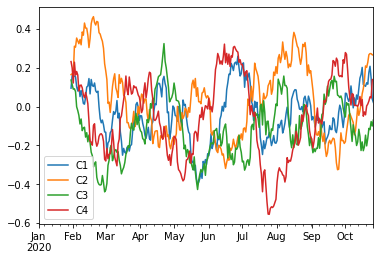

In [145]:
df.rolling(30).mean().plot()
# 30일 이동평균선을 보여줌

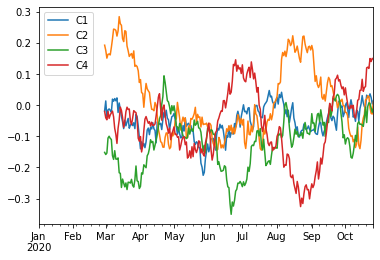

In [146]:
df.rolling(60).mean().plot();

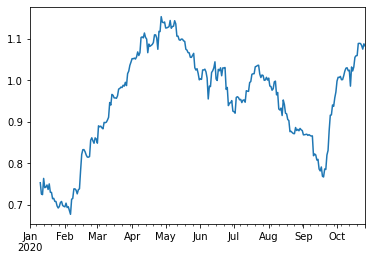

In [148]:
df.C1.rolling(60, min_periods=10).std().plot();

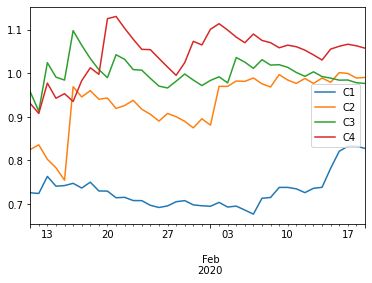

In [149]:
df.rolling(60, min_periods=10).std()[10:50].plot();

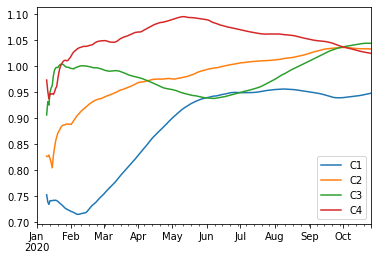

In [150]:
df.rolling(60, min_periods=10).std().expanding().mean().plot();

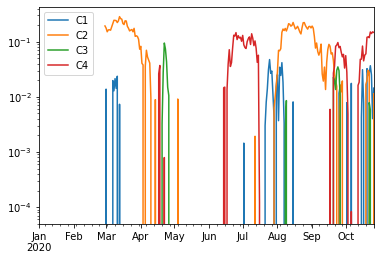

In [151]:
df.rolling(60).mean().plot(logy=True);

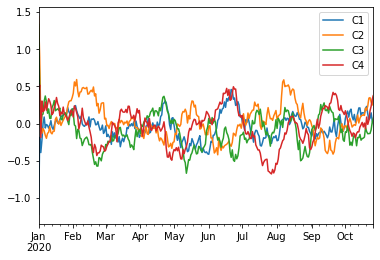

In [152]:
df.rolling('20D').mean().plot();

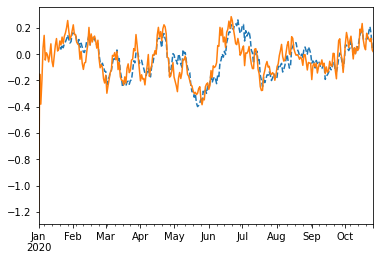

In [153]:
df.C1.rolling(30, min_periods=20).mean().plot(style='--', label='simple MA')
df.C1.ewm(span=30).mean().plot(style='-', label='EWMA');

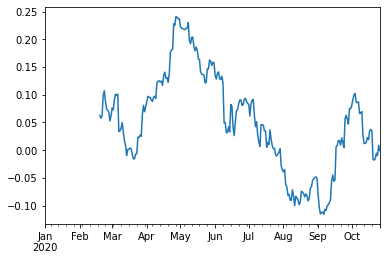

In [154]:
df.C1.rolling(100, min_periods=50).corr(df.C3).plot();

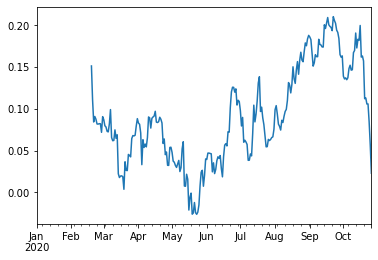

In [155]:
df.C2.rolling(100, min_periods=50).corr(df.C4).plot();